# Import Packages

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
import pandas_datareader.data as pdweb
from pandas_datareader import data as pdr
import yfinance as yf # must pip install first 

In [3]:
## models
#from arch import arch_model
from sklearn.model_selection import TimeSeriesSplit
import sys
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from dateutil.parser import parse 
import datetime
pd.set_option("display.max_rows", 5000)

PACKAGE CONTENTS
    base
    multi
    shared
    ticker
    tickers
    utils

In [4]:
#help(yf)

In [5]:
#help(yf.Tickers)

In [6]:
tickerStrings = ['AAPL', 'MSFT']
df = yf.download(tickerStrings, group_by='Ticker', period='2d')

[*********************100%***********************]  2 of 2 completed


In [7]:
closePrice_GSPC = pdr.get_data_yahoo('^GSPC', start="2017-01-01", end='2021-04-15')['Close']
closePrice_GSPC.tail(5)

Date
2021-04-09    4128.799805
2021-04-12    4127.990234
2021-04-13    4141.589844
2021-04-14    4124.660156
2021-04-15    4170.419922
Name: Close, dtype: float64

# Step 1 Inputs from user
read input data from SQL/webpage
- company/tickers name
- price
- purchase date
- numer of shares/postion

In [8]:
#tickers = input('Please enter your tickers seperated by ,:').split(',')
#purchaseDate = input('Please enter your purchase date accordingly:').split(',')
#shares = input('Please enter number of shares bought for each ticker:'),split(',')

In [9]:
# take an example
benchmark = ['SPY']
tickers = ['WFC', 'SYF', 'NBN','COUR','CHWY'] #the inputed tickers from users
#buyprice = [23722.39, 34159.99, 6578.84, 4500.0, 4135.49]
purchaseDate = ['2020-10-20', '2019-05-01', '2019-05-01', '2021-03-01', '2021-04-01']
sellDate = ['2021-04-15', '2021-04-15', '2021-04-15', '2021-04-15', '2021-04-15']
numberofShares = [1040, 1000, 305, 100, 50]

# Step 2 Basic Calculation from Inputs

In [10]:
marketCap=[]
for i in range(len(tickers)):
    #print(ticker)
    marketCap.append(yf.Tickers(tickers).tickers[i].info['marketCap'])
print(marketCap, np.mean(marketCap)) # arithmetic mean

[176825827328, 23191576576, 252106880, 5752767488, 33054855168] 47815426688.0


In [11]:
totalCap = np.sum(marketCap)
wts = marketCap / np.sum(marketCap) #percentage of each ticker
print('The weights of each ticker is:', wts)

The weights of each ticker is: [0.73961832 0.09700458 0.0010545  0.02406239 0.13826021]


Text(0.5, 1.0, 'Weights of each ticker among portfolio')

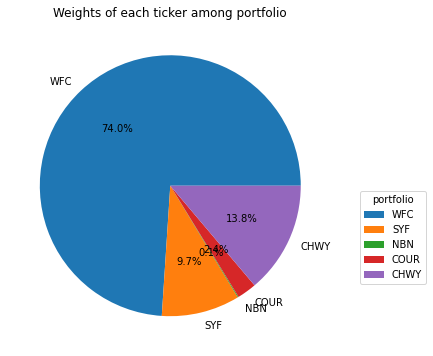

In [12]:
pie, ax = plt.subplots(figsize=[10,6])
wedges, texts, autotexts = ax.pie(wts, labels = tickers, autopct='%1.1f%%')
ax.legend(wedges, tickers, title='portfolio', bbox_to_anchor=(0.8, 0, 0.5, 0.5))
#ax.set_title('Weights of each ticker among portfolio')
plt.title('Weights of each ticker among portfolio')

#### $Daily Return = \frac{Current Day Closed Price - Previous Day Closed Price}{Previous Day Closed Price} * 100 \% $.

In [13]:
def show_figs(tickers, purchaseDate, sellDate):
    price = {}
    dailyReturn = {}
    for i in range(len(tickers)):
    #plot the overall trend and daily return for each ticker
        price[tickers[i]] = pdr.get_data_yahoo(tickers[i], start=purchaseDate[i], end=sellDate[i])['Close']
        dailyReturn[tickers[i]] = price[tickers[i]].pct_change()[1:]
        plt.figure(figsize=(16,8), dpi=100)
        ax1 = plt.subplot(2, 1, 1)
        plt.plot(price[tickers[i]])
        plt.title('{} Close Price Overall Trend Since {}'.format(tickers[i], purchaseDate[i]))
        ax2 = plt.subplot(2, 1, 2)
        plt.plot(dailyReturn[tickers[i]])
        plt.axhline(y=0,linewidth=1, color='black',linestyle='--')
        plt.title('{} dailyReturn Since {}'.format(tickers[i], purchaseDate[i]))
        plt.savefig('figs/{} trend and return.png'.format(tickers[i]), bbox_inches=0, pad_inches='tight')   

#### $profit = (sellPrice - buyPrice) * numberofShares$

In [14]:
def cal_profit(tickers, purchaseDate, sellDate, numberofShares):
    price = {}
    dailyReturn = {}
    profit = {}
    sum = 0
    for i in range(len(tickers)):
        price[tickers[i]] = pdr.get_data_yahoo(tickers[i], start=purchaseDate[i], end=sellDate[i])['Close']
        dailyReturn[tickers[i]] = price[tickers[i]].pct_change()[1:]
        profit[tickers[i]] = (price[tickers[i]][-1] - price[tickers[i]][0]) * numberofShares[i]
        sum += ((price[tickers[i]][-1] - price[tickers[i]][0]) * numberofShares[i])
    return (profit, 'totalProfit', sum)

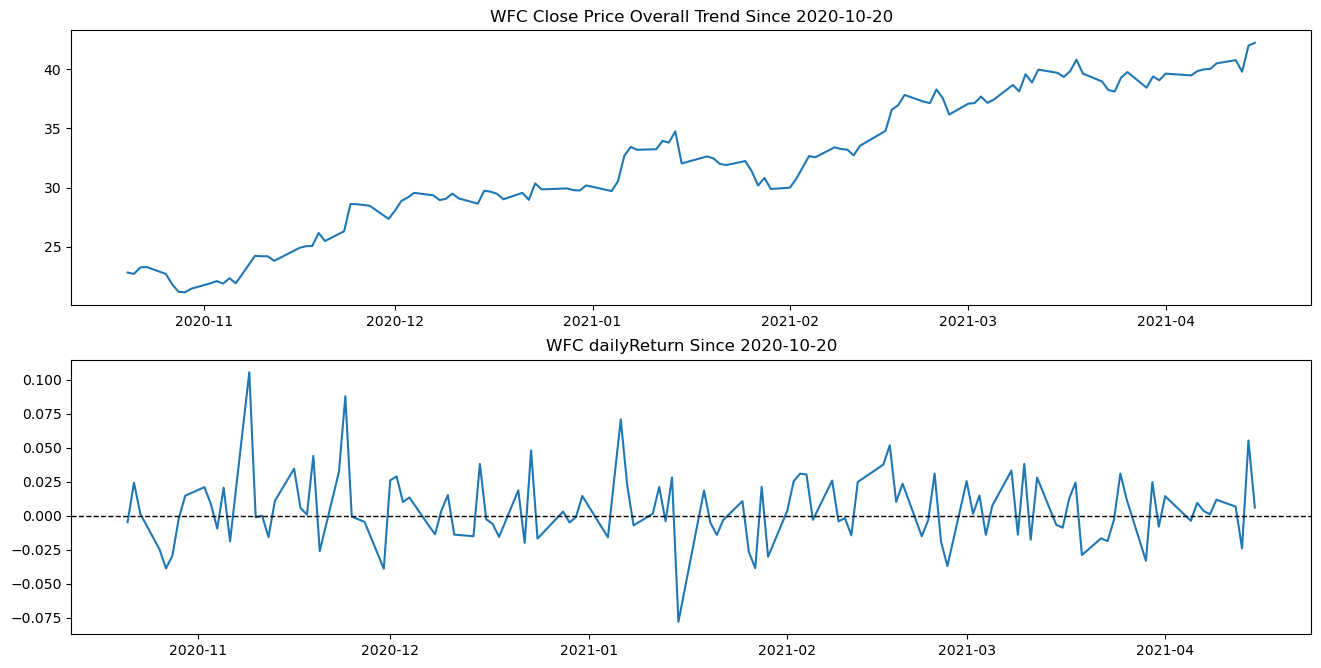

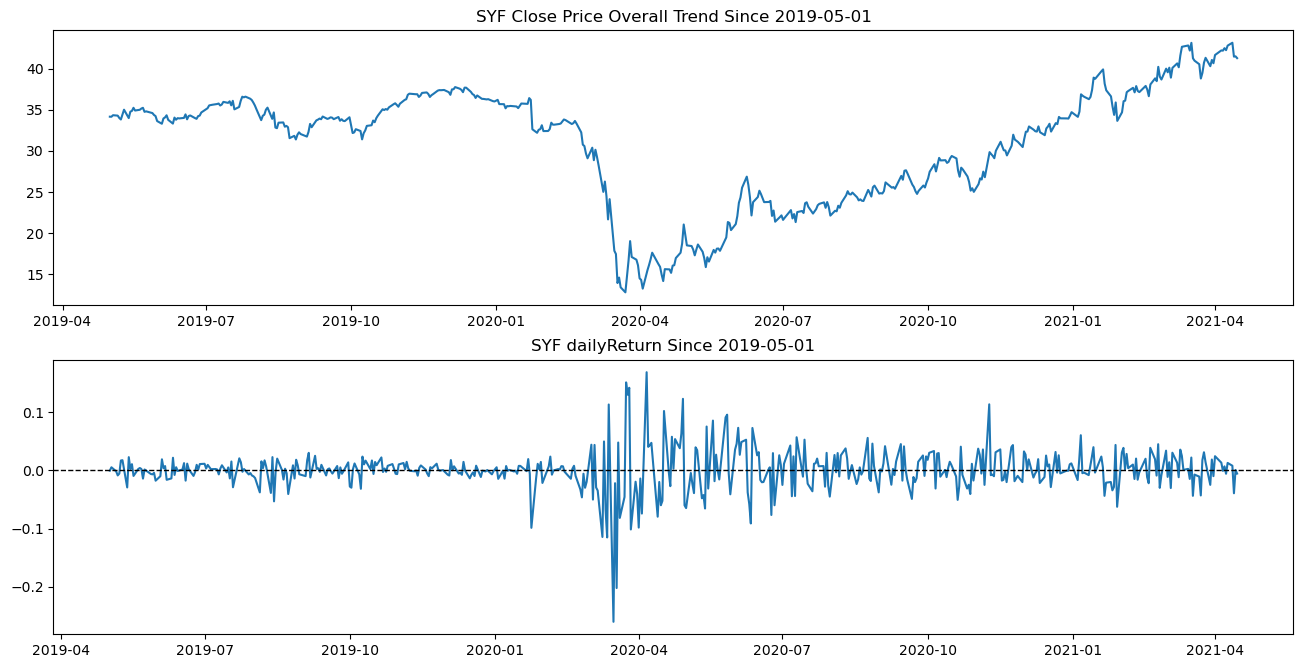

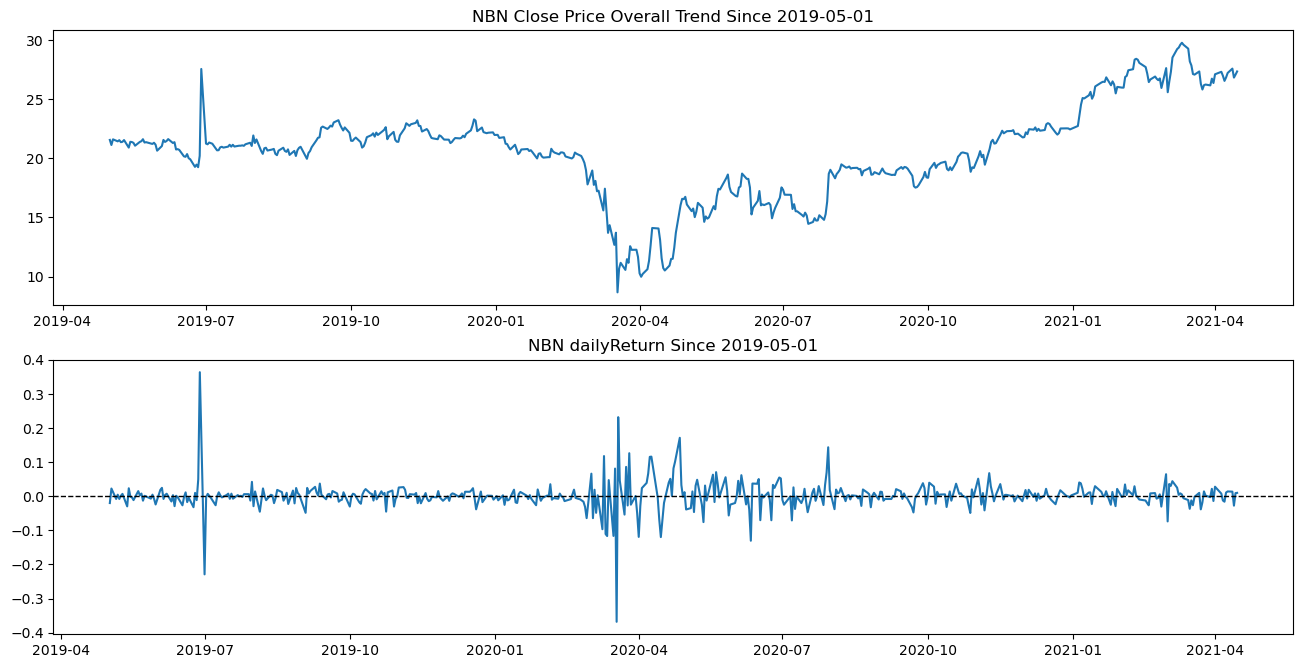

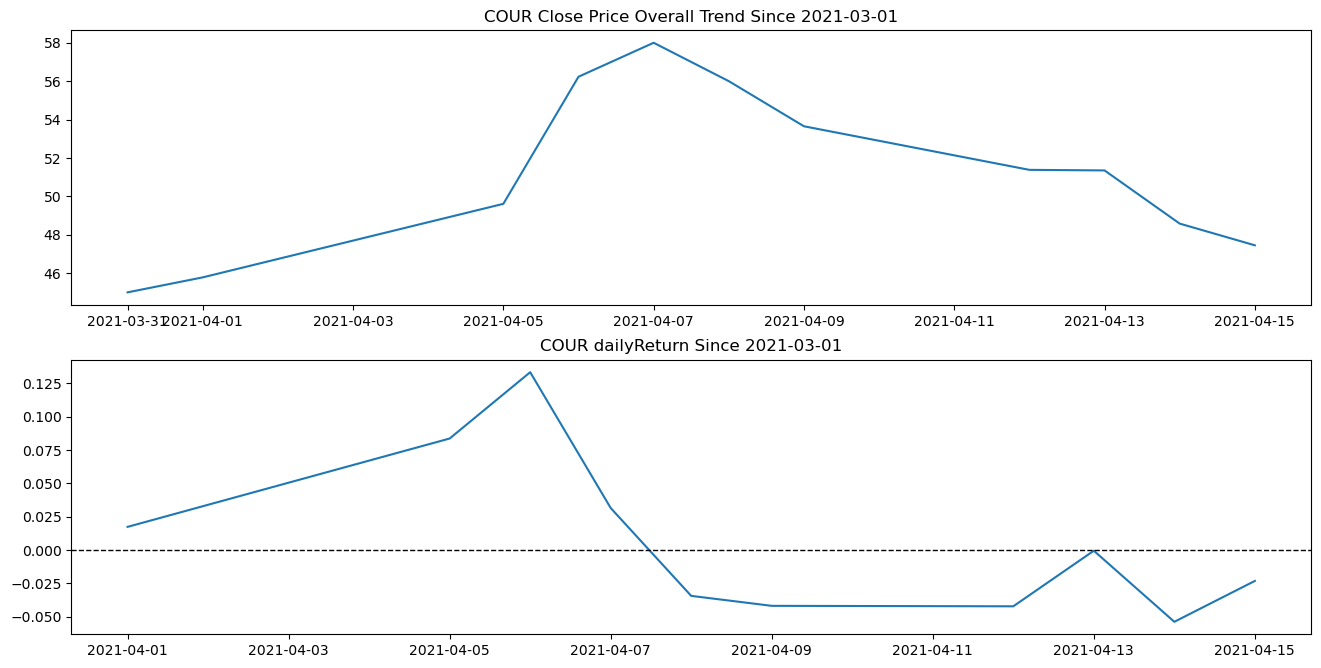

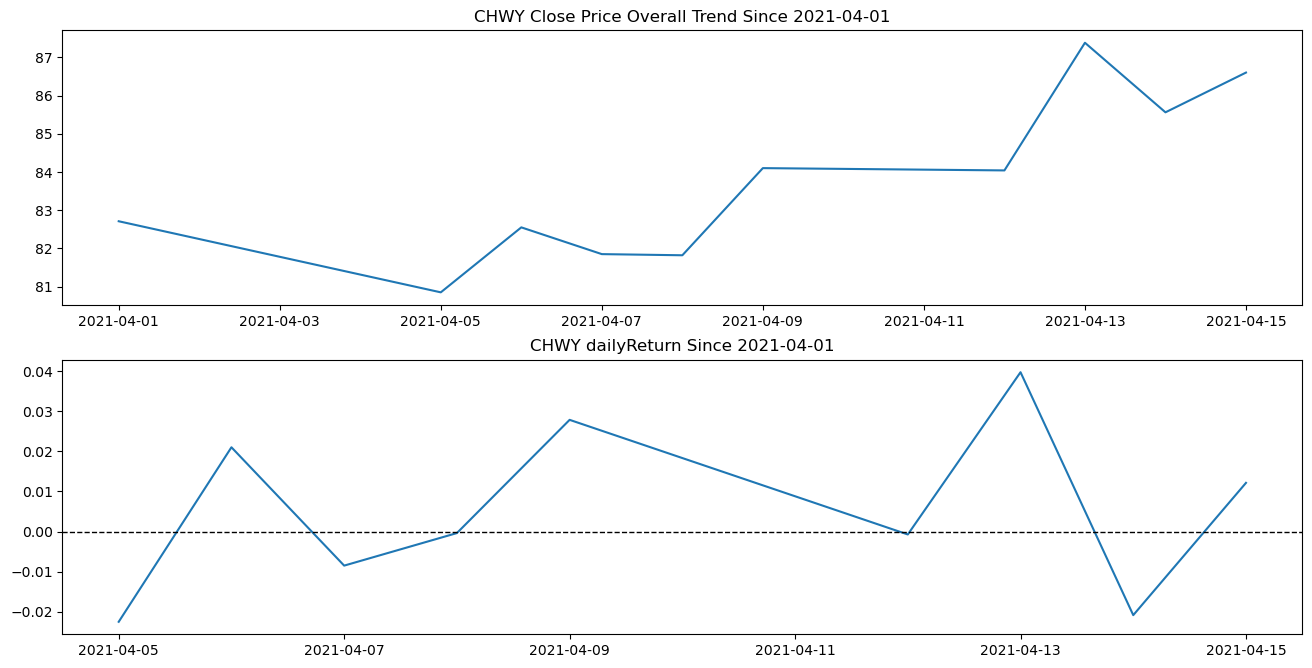

In [15]:
show_figs(tickers, purchaseDate, sellDate)

In [28]:
profit = cal_profit(tickers, purchaseDate, sellDate, numberofShares)

In [29]:
profit

({'WFC': 20207.20230102539,
  'SYF': 7119.998931884766,
  'NBN': 1769.0003490447998,
  'COUR': 245.0000762939453,
  'CHWY': 194.49996948242188},
 'totalProfit',
 29535.701627731323)

# Step 3 Market Beta Comprison
??? the start date mush match between market return and por

In [ ]:
#benchmark_object.SPY.info

# Step 4 Suppose user choose from any history date

In [18]:
# enter the hypothetical purchase date and seel date
purchaseDateHypo = ["2020-03-01", "2020-02-01", "2020-02-01", "2020-02-01", "2020-02-01", '2020-01-01']
sellDateHypo = ['2021-04-15', '2021-04-15', '2021-04-15', '2021-04-15', '2021-04-15', '2021-04-15']
# enter new portfolio by adding some more tickers
tickersHypo = ['WFC', 'SYF', 'NBN','COUR','CHWY', 'TSLA']
numberofSharesHypo = [1040, 1000, 305, 100, 50, 1000]

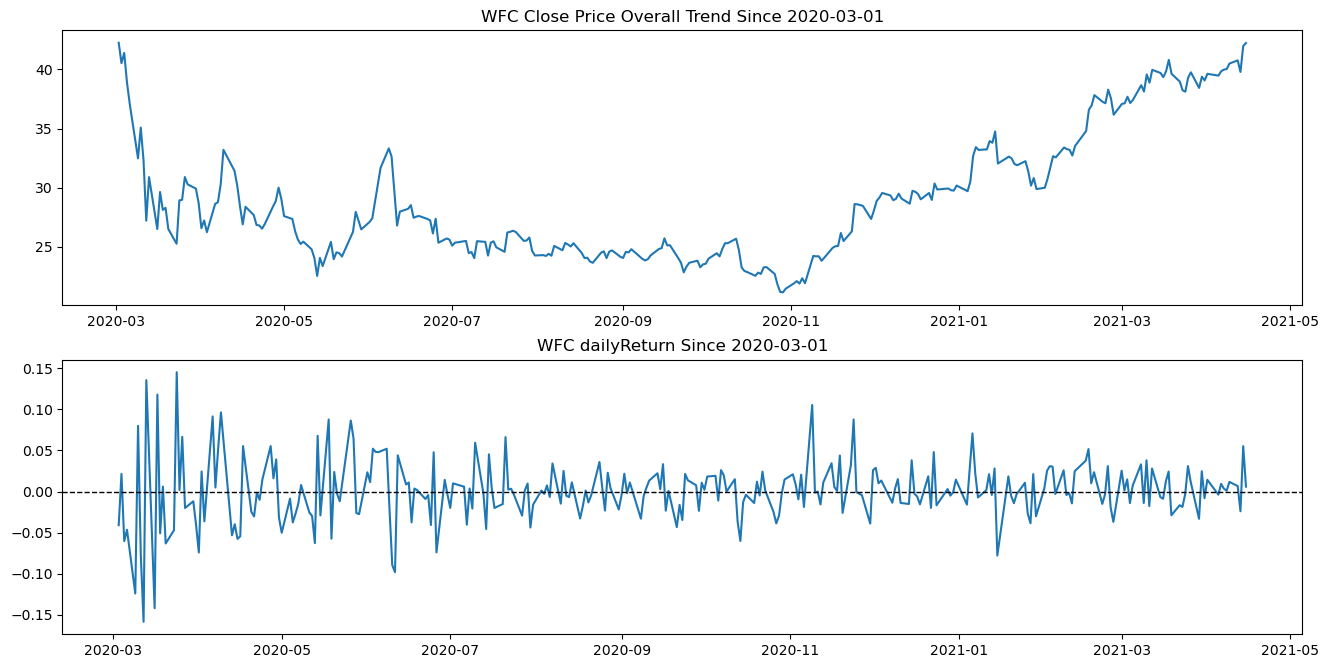

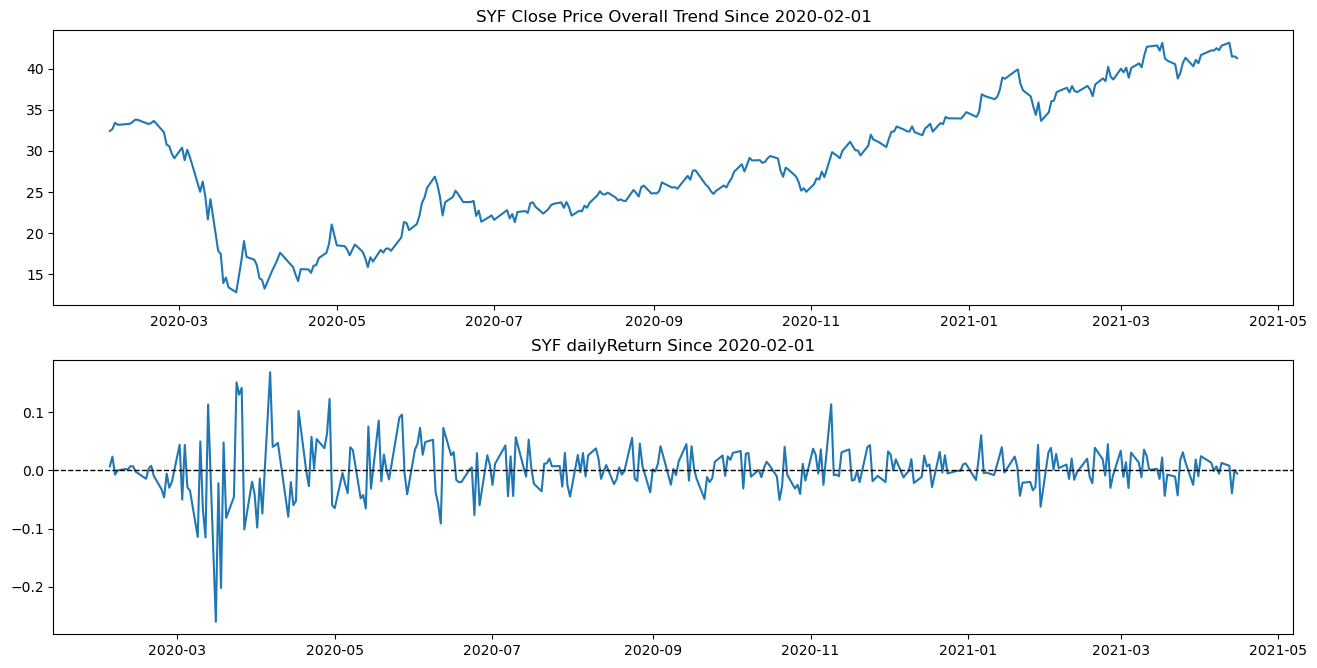

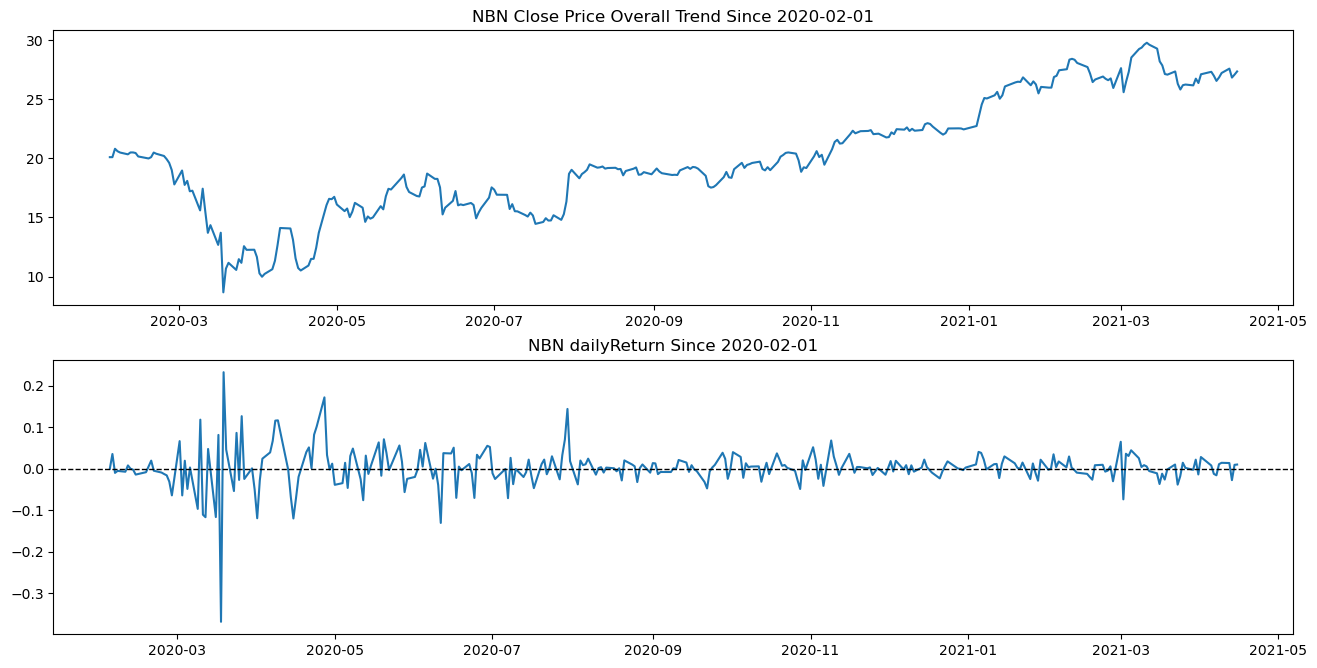

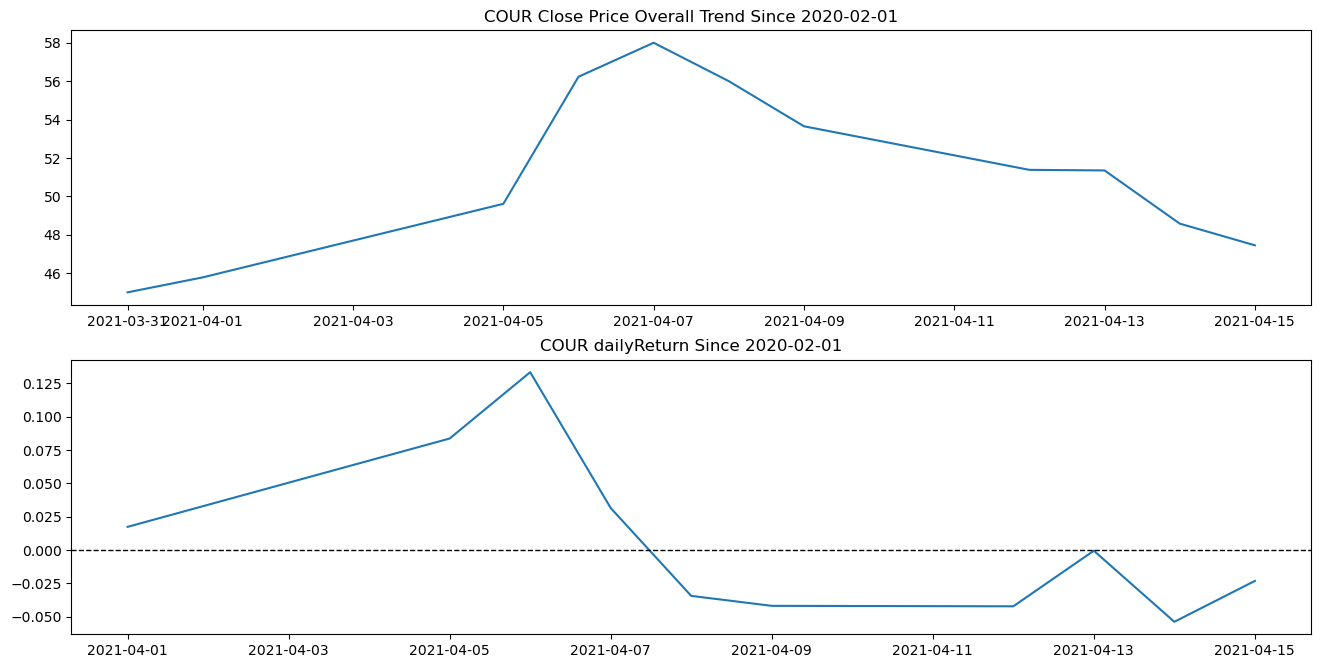

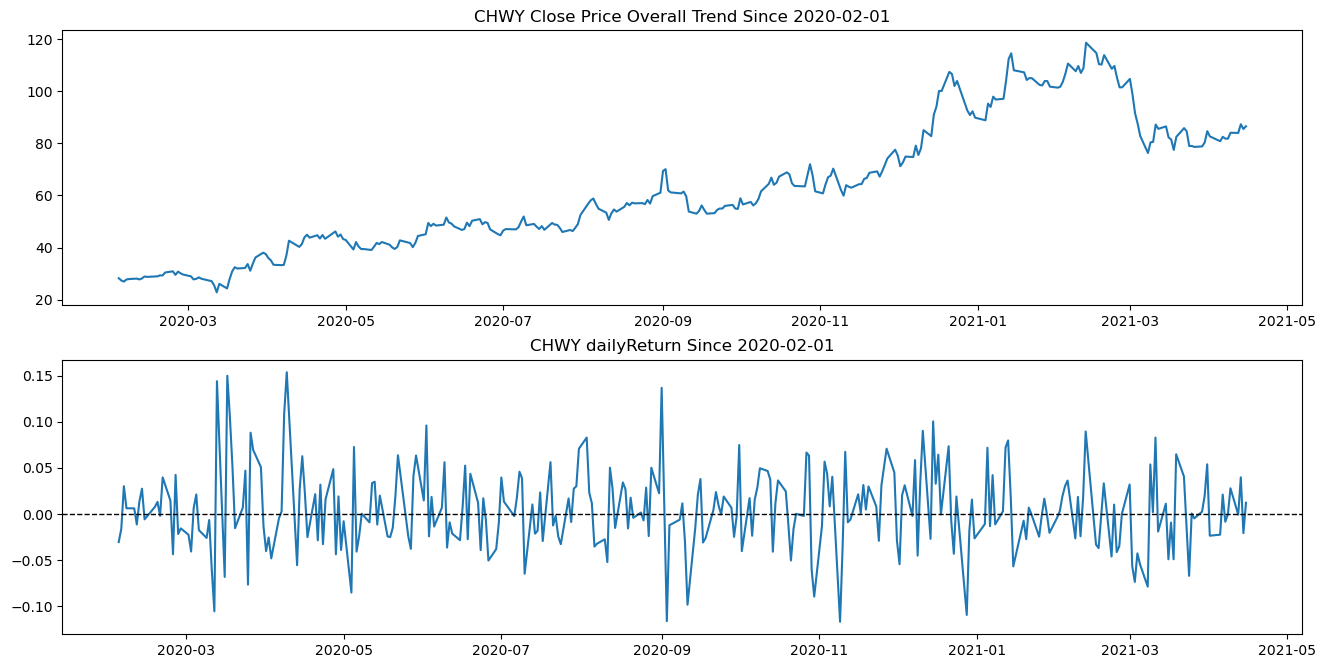

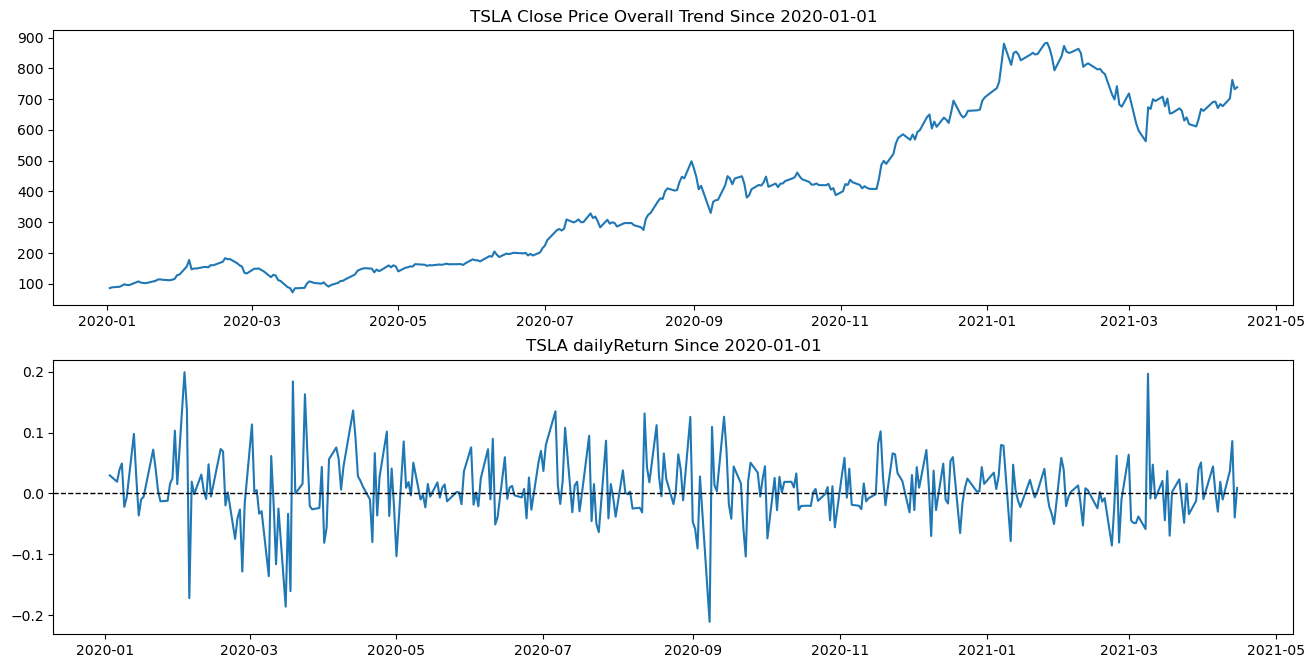

In [19]:
show_figs(tickersHypo, purchaseDateHypo, sellDateHypo)

In [30]:
profitHypo = cal_profit(tickersHypo,  purchaseDateHypo, sellDateHypo, numberofSharesHypo)

In [32]:
profitHypo

({'WFC': -20.7965087890625,
  'SYF': 8860.000610351562,
  'NBN': 2214.30006980896,
  'COUR': 245.0000762939453,
  'CHWY': 2919.999885559082,
  'TSLA': 652797.9736328125},
 'totalProfit',
 667016.477766037)

In [35]:
profit[2] - profitHypo[2]

-637480.7761383057